### 201710754 김종은

Sklearn으로 이진 베이지안 모델링을 해보자.

* (1) X, Y 데이터를 생성

* (2) X의 평균과 표준편차 계산해서 출력

* (3) 그래프 작성

    * scatter() 함수에 c=Y 옵션을 넣으면, Y의 값에 대해 다른 색으로 표시할 수 있다.

* (4) 훈련데이터, 테스트데이터 3:1로 분리

   * train_test_split()함수를 사용하면 원하는 비율로 분리할 수 있다.

* (5) 훈련데이터에 대하여 BernoulliNB 모델링

    * X데이터는 연속 값이다. binarize=0.0으로 설정하여 이진수로 모델링한다.

* (6) 테스트데이터에 대하여 예측값을 출력

    * 예측이 맞는지 실제값 Y와 비교해보자.

* (7) 테스트데이터에 대하여 예측과 실제의 정확성 출력

### (1) X, Y 데이터를 생성

In [1]:
from sklearn.datasets import make_classification

X, Y = make_classification(n_samples=100, n_features=2, n_informative=2, n_redundant=0)

In [6]:
print(X[0:5])
print(Y[0:5])
print(len(X))

[[ 1.2301181  -1.48632106]
 [-0.90910352 -0.77001844]
 [-1.44128165  0.44474323]
 [-1.01204603 -1.03785908]
 [ 0.07744458  2.02077273]]
[0 0 1 0 1]
100


### (2) X의 평균과 표준편차 계산해서 출력

In [10]:
import numpy as np

mean = np.mean(X)
print("X 평균:",mean)
std = np.std(X)
print("X 표준편차:",std)

X 평균: 0.04887805585383623
X 표준편차: 1.4628350897552653


### (3) 그래프 작성

scatter() 함수에 c=Y 옵션을 넣으면, Y의 값에 대해 다른 색으로 표시할 수 있다.

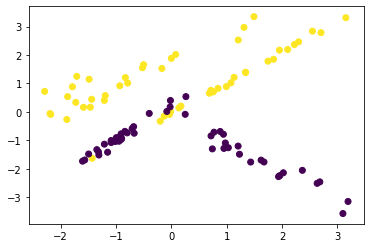

In [15]:
import matplotlib.pyplot as plt

plt.scatter(x=X[:,0], y=X[:,1],c=Y)
plt.show()

### (4) 훈련데이터, 테스트데이터 3:1로 분리

train_test_split()함수를 사용하면 원하는 비율로 분리할 수 있다.

In [16]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.33, random_state=42)

In [18]:
print(len(X_train))
print(len(y_train))
print(len(X_test))

67
67
33


### (5) 훈련데이터에 대하여 BernoulliNB 모델링

X데이터는 연속 값이다. binarize=0.0으로 설정하여 이진수로 모델링한다.

In [19]:
from sklearn.naive_bayes import BernoulliNB

bnb = BernoulliNB(binarize=0.0)
bnb.fit(X, Y)

BernoulliNB(alpha=1.0, binarize=0.0, class_prior=None, fit_prior=True)

### (6) 테스트데이터에 대하여 예측값을 출력

예측이 맞는지 실제값 Y와 비교해보자.

In [20]:
bnb.predict(X_test)

array([1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1,
       1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0])

In [25]:
bnb.score(X_test, y_test)

0.9393939393939394

### (7) 테스트데이터에 대하여 예측과 실제의 정확성 출력

In [26]:
from sklearn.model_selection import cross_val_score

cross_val_score(bnb, X_test, y_test, scoring='accuracy', cv=10).mean()

0.9416666666666667